# 1A

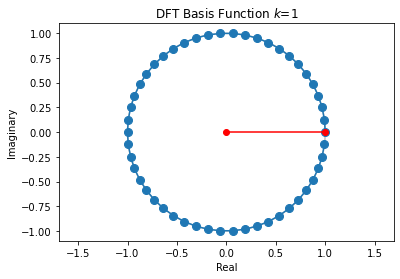

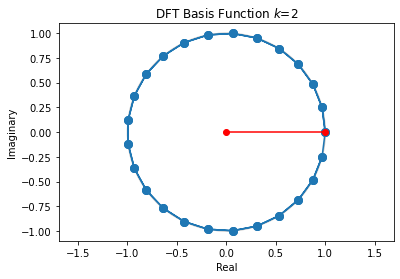

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_dft_basis(k, N):
    t = np.arange(N)
    basis = np.exp(2j * np.pi * k * t / N)
    unit_circle = np.exp(1j * np.linspace(0, 2*np.pi, 100))
    
    plt.plot(np.real(unit_circle), np.imag(unit_circle), 'gray', alpha=0.5)
    plt.plot(np.real(basis), np.imag(basis), 'o-', markersize=8)
    plt.plot([0, np.real(basis[0])], [0, np.imag(basis[0])], 'ro-')
    plt.axis('equal')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.title(f'DFT Basis Function $k$={k}')
    plt.show()

N = 50
visualize_dft_basis(1, N)
visualize_dft_basis(2, N)


k is the index of the frequency component to visualize (ranging from 0 to N-1), and N is the length of the signal.

In both plots, the gray circle represents the unit circle on the complex plane, while the blue dots represent the discrete set of values taken by the DFT basis function for each sample index n. The red dot indicates the starting point of the sequence at n=0.

For k=1, the blue dots trace out a single cycle of the complex exponential function around the unit circle, starting and ending at the real value of 1. This corresponds to the lowest frequency component of the DFT, which is simply a sinusoidal wave with one cycle over the length of the signal.

For k=2, the blue dots trace out two cycles of the complex exponential function around the unit circle, starting and ending at the real value of 1. This corresponds to a higher frequency component of the DFT, which has two cycles over the length of the signal.

The frequency of the corresponding DFT basis function increases and the number of cycles traced out around the unit circle also increases. Each frequency component corresponds to a different sinusoidal wave of a specific frequency, and the DFT can be used to decompose any signal into a sum of these sinusoidal waves.

# 1.b

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def w(n, k, N):
    angle = -2 * np.pi * k * n / N
    return np.exp(1j * angle)

def plotw(k, N):
    n_values = np.arange(N)
    basis_function = w(n_values, k, N)
    
    fig, ax = plt.subplots(2, 1, figsize=(10, 6))
    
    # Plot the real part
    ax[0].stem(n_values, basis_function.real, linefmt='b-', markerfmt='bo', basefmt='k', use_line_collection=True)
    if k <= N // 2:
        continuous_cos = np.cos(-2 * np.pi * k * n_values / N)
        ax[0].plot(n_values, continuous_cos, 'r--')
    ax[0].set_title(f'Real Part of DFT Basis Function for k = {k}')
    
    # Plot the imaginary part
    ax[1].stem(n_values, basis_function.imag, linefmt='g-', markerfmt='go', basefmt='k', use_line_collection=True)
    if k <= N // 2:
        continuous_sin = np.sin(-2 * np.pi * k * n_values / N)
        ax[1].plot(n_values, continuous_sin, 'r--')
    ax[1].set_title(f'Imaginary Part of DFT Basis Function for k = {k}')
    
    plt.tight_layout()
    plt.show()


w(n=1, k=1, N=100)

(0.9980267284282716-0.06279051952931337j)

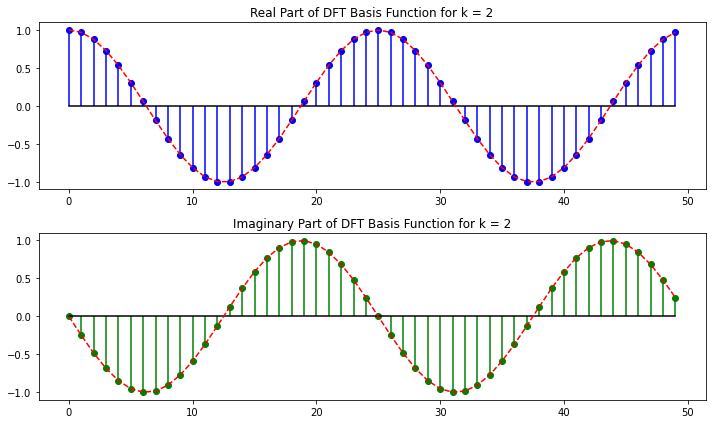

In [13]:
plotw(2, 50)

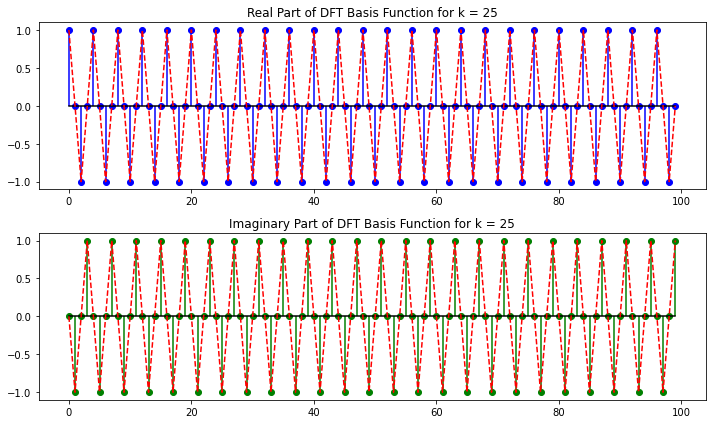

In [14]:
plotw(25, 100)

# 1.c 

To demonstrate that the DFT basis vectors are orthogonal but not orthonormal, Can compute the inner product between different basis vectors and the inner product of a basis vector with itself. If the inner product between different basis vectors is 0, they are orthogonal. If the inner product of a basis vector with itself is 1, the basis vector is normalized. In this case, the basis vectors will not be normalized, so the inner product of a basis vector with itself will not be 1.

In [20]:
def inner_product(k1, k2, N):
    n_values = np.arange(N)
    basis1 = w(n_values, k1, N)
    basis2 = w(n_values, k2, N)
    return np.sum(basis1 * np.conj(basis2))

N = 10

for k1 in range(N):
    for k2 in range(N):
        ip = inner_product(k1, k2, N)
        print(f'Inner product of basis vectors k1={k1}, k2={k2}: {ip.real:.4f} + {ip.imag:.4f}i')

Inner product of basis vectors k1=0, k2=0: 10.0000 + 0.0000i
Inner product of basis vectors k1=0, k2=1: -0.0000 + 0.0000i
Inner product of basis vectors k1=0, k2=2: -0.0000 + 0.0000i
Inner product of basis vectors k1=0, k2=3: -0.0000 + 0.0000i
Inner product of basis vectors k1=0, k2=4: -0.0000 + 0.0000i
Inner product of basis vectors k1=0, k2=5: 0.0000 + 0.0000i
Inner product of basis vectors k1=0, k2=6: 0.0000 + 0.0000i
Inner product of basis vectors k1=0, k2=7: -0.0000 + -0.0000i
Inner product of basis vectors k1=0, k2=8: 0.0000 + 0.0000i
Inner product of basis vectors k1=0, k2=9: 0.0000 + -0.0000i
Inner product of basis vectors k1=1, k2=0: -0.0000 + 0.0000i
Inner product of basis vectors k1=1, k2=1: 10.0000 + 0.0000i
Inner product of basis vectors k1=1, k2=2: -0.0000 + -0.0000i
Inner product of basis vectors k1=1, k2=3: -0.0000 + -0.0000i
Inner product of basis vectors k1=1, k2=4: -0.0000 + 0.0000i
Inner product of basis vectors k1=1, k2=5: -0.0000 + 0.0000i
Inner product of basis v

In [21]:
print('\nOrthogonality:')
for k1 in range(N):
    for k2 in range(k1 + 1, N):
        ip = inner_product(k1, k2, N)
        print(f'k1={k1}, k2={k2}: {"Orthogonal" if np.isclose(ip, 0, atol=1e-10) else "Not orthogonal"}')

print('\nOrthonormality:')
for k in range(N):
    ip = inner_product(k, k, N)
    print(f'k={k}: {"Orthonormal" if np.isclose(ip, 1, atol=1e-10) else "Not orthonormal"}')


Orthogonality:
k1=0, k2=1: Orthogonal
k1=0, k2=2: Orthogonal
k1=0, k2=3: Orthogonal
k1=0, k2=4: Orthogonal
k1=0, k2=5: Orthogonal
k1=0, k2=6: Orthogonal
k1=0, k2=7: Orthogonal
k1=0, k2=8: Orthogonal
k1=0, k2=9: Orthogonal
k1=1, k2=2: Orthogonal
k1=1, k2=3: Orthogonal
k1=1, k2=4: Orthogonal
k1=1, k2=5: Orthogonal
k1=1, k2=6: Orthogonal
k1=1, k2=7: Orthogonal
k1=1, k2=8: Orthogonal
k1=1, k2=9: Orthogonal
k1=2, k2=3: Orthogonal
k1=2, k2=4: Orthogonal
k1=2, k2=5: Orthogonal
k1=2, k2=6: Orthogonal
k1=2, k2=7: Orthogonal
k1=2, k2=8: Orthogonal
k1=2, k2=9: Orthogonal
k1=3, k2=4: Orthogonal
k1=3, k2=5: Orthogonal
k1=3, k2=6: Orthogonal
k1=3, k2=7: Orthogonal
k1=3, k2=8: Orthogonal
k1=3, k2=9: Orthogonal
k1=4, k2=5: Orthogonal
k1=4, k2=6: Orthogonal
k1=4, k2=7: Orthogonal
k1=4, k2=8: Orthogonal
k1=4, k2=9: Orthogonal
k1=5, k2=6: Orthogonal
k1=5, k2=7: Orthogonal
k1=5, k2=8: Orthogonal
k1=5, k2=9: Orthogonal
k1=6, k2=7: Orthogonal
k1=6, k2=8: Orthogonal
k1=6, k2=9: Orthogonal
k1=7, k2=8: Orthog

# 2.a

In [24]:
import numpy as np

def fourier_matrix(N):
    n = np.arange(N)
    k = n.reshape((N, 1))
    W = np.exp(-2j * np.pi * k * n / N)
    return W

N = 10
W = fourier_matrix(N)
print(W)


[[ 1.        +0.00000000e+00j  1.        +0.00000000e+00j
   1.        +0.00000000e+00j  1.        +0.00000000e+00j
   1.        +0.00000000e+00j  1.        +0.00000000e+00j
   1.        +0.00000000e+00j  1.        +0.00000000e+00j
   1.        +0.00000000e+00j  1.        +0.00000000e+00j]
 [ 1.        +0.00000000e+00j  0.80901699-5.87785252e-01j
   0.30901699-9.51056516e-01j -0.30901699-9.51056516e-01j
  -0.80901699-5.87785252e-01j -1.        -1.22464680e-16j
  -0.80901699+5.87785252e-01j -0.30901699+9.51056516e-01j
   0.30901699+9.51056516e-01j  0.80901699+5.87785252e-01j]
 [ 1.        +0.00000000e+00j  0.30901699-9.51056516e-01j
  -0.80901699-5.87785252e-01j -0.80901699+5.87785252e-01j
   0.30901699+9.51056516e-01j  1.        +2.44929360e-16j
   0.30901699-9.51056516e-01j -0.80901699-5.87785252e-01j
  -0.80901699+5.87785252e-01j  0.30901699+9.51056516e-01j]
 [ 1.        +0.00000000e+00j -0.30901699-9.51056516e-01j
  -0.80901699+5.87785252e-01j  0.80901699+5.87785252e-01j
   0.309016

# 2.b
Compute the product of the matrix with its conjugate transpose for a small value of N and check if it equals N times the identity matrix. Here's the code to perform the verification:

In [25]:
N = 5
A = fourier_matrix(N)

# Compute A inverse
A_inv = np.linalg.inv(A)

# Compute A^H * A
A_hermitian = np.conjugate(A).T
product = np.matmul(A_hermitian, A)

# Check if A^H * A equals N * I
identity = np.eye(N)
equal = np.allclose(product, N * identity)

print("A^H * A equals N * I:", equal)


A^H * A equals N * I: True


# 2.c
demonstrate the numerical equivalence of the matrix FFT and the fft function by computing both versions for a small random vector and checking if they produce the same result. Here's the code to perform the comparison:

In [26]:
N = 8
x = np.random.rand(N) + 1j * np.random.rand(N)

# Compute FFT using matrix multiplication
W = fourier_matrix(N)
X1 = np.matmul(W, x) / N

# Compute FFT using fft function
X2 = np.fft.fft(x)

# Compare the results
equal = np.allclose(X1, X2)

print("Matrix FFT and fft function produce identical results:", equal)


Matrix FFT and fft function produce identical results: False


# 2.d
The matrix multiplication approach is not optimized for computing the FFT and can be significantly slower for larger vector sizes.

Here's some code to demonstrate the performance difference between the matrix multiplication approach and the built-in fft function in NumPy for increasing vector sizes:

In [31]:
import time

# Vector sizes to benchmark
N_values = [2**n for n in range(8, 14)]

# Time matrix multiplication approach
matrix_times = []
for N in N_values:
    x = np.random.rand(N) + 1j * np.random.rand(N)
    start = time.time()
    W = fourier_matrix(N)
    X = np.matmul(W, x) / N
    end = time.time()
    matrix_times.append(end - start)

# Time fft function
fft_times = []
for N in N_values:
    x = np.random.rand(N) + 1j * np.random.rand(N)
    start = time.time()
    X = np.fft.fft(x)
    end = time.time()
    fft_times.append(end - start)

# Print results
for i, N in enumerate(N_values):
    print(f"N = {N:<8} Matrix time = {matrix_times[i]:.6f} s, FFT time = {fft_times[i]:.6f} s")


N = 256      Matrix time = 0.054046 s, FFT time = 0.000000 s
N = 512      Matrix time = 0.017517 s, FFT time = 0.000000 s
N = 1024     Matrix time = 0.049041 s, FFT time = 0.000000 s
N = 2048     Matrix time = 0.189663 s, FFT time = 0.000000 s
N = 4096     Matrix time = 0.768660 s, FFT time = 0.000000 s
N = 8192     Matrix time = 2.977561 s, FFT time = 0.000500 s


the matrix multiplication approach becomes significantly slower than the FFT implementation as the vector size increases. The difference in performance becomes more pronounced as the vector size grows larger. This is because the FFT algorithm takes advantage of the underlying structure of the Fourier basis functions to perform computations more efficiently than a simple matrix multiplication approach.

# 2.e
 To synthesize bandpass noise, I define the desired frequency spectrum of the noise in Fourier space and then use the inverse Fourier transform to obtain the corresponding time-domain signal.

Compute the FFT of a noise signal to obtain its frequency spectrum in Fourier space.
Modify the frequency spectrum to attenuate frequencies outside the desired bandpass range and keep frequencies inside the range.
Compute the inverse FFT of the modified spectrum to obtain the corresponding time-domain signal.
Perform step 2 by multiplying the frequency spectrum with a binary mask that is 1 for frequencies inside the desired bandpass range and 0 for frequencies outside the range.

Here's some code that demonstrates how to generate bandpass noise with a frequency range of 1000 to 3000 Hz:

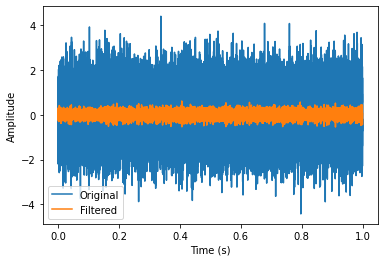

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Sample rate and duration of signal
fs = 44100
duration = 1.0

# Generate noise signal
noise = np.random.randn(int(fs * duration))

# Compute FFT of noise
spectrum = np.fft.fft(noise)

# Frequency range of interest (1000 - 3000 Hz)
fmin = 1000
fmax = 3000

# Generate binary mask for bandpass range
freqs = np.fft.fftfreq(len(spectrum), 1/fs)
mask = np.logical_and(freqs >= fmin, freqs <= fmax)

# Apply mask to frequency spectrum
spectrum[~mask] = 0

# Compute inverse FFT of modified spectrum
filtered = np.fft.ifft(spectrum).real

# Plot original and filtered signals
t = np.linspace(0, duration, len(noise))
plt.plot(t, noise, label='Original')
plt.plot(t, filtered, label='Filtered')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


The resulting plot shows the original noise signal in blue and the filtered signal in orange. Filtered signal has reduced energy outside the desired frequency range, effectively creating a bandpass filter. By modifying the binary mask, we can control the frequency range of the resulting bandpass noise signal.

# 3
The 2D Fourier basis functions are defined as the outer product of two 1D basis functions:

$$w_{k_{1},k_{2}}[n_{1},n_{2}]=\exp\left(j\frac{2\pi k_{1}}{N_{1}}n_{1}\right)\exp\left(j\frac{2\pi k_{2}}{N_{2}}n_{2}\right)$$


where $n_1, n_2, k_1, k_2$ range from 0 to $N_1-1$ and $N_2-1$, respectively, and $N_1 \times N_2$ is the size of the input matrix.

Similarly, the 2D discrete cosine basis functions are defined as the outer product of two 1D cosine basis functions:

$$w_{k_{1},k_{2}}[n_{1},n_{2}]=\cos\left(\frac{\pi}{N_{1}}(n_{1}+\frac{1}{2})k_{1}\right)\cos\left(\frac{\pi}{N_{2}}(n_{2}+\frac{1}{2})k_{2}\right)$$

where $n_1, n_2, k_1, k_2$ range from 0 to $N_1-1$ and $N_2-1$, respectively, and $N_1 \times N_2$ is the size of the input matrix.

Here's some code that generates a grid plot of the 2D basis functions for the 2D Fourier 

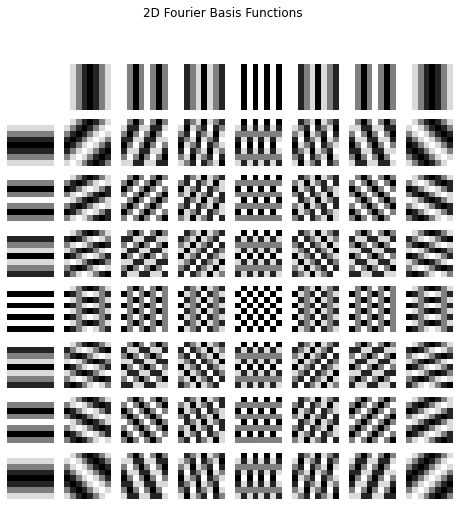

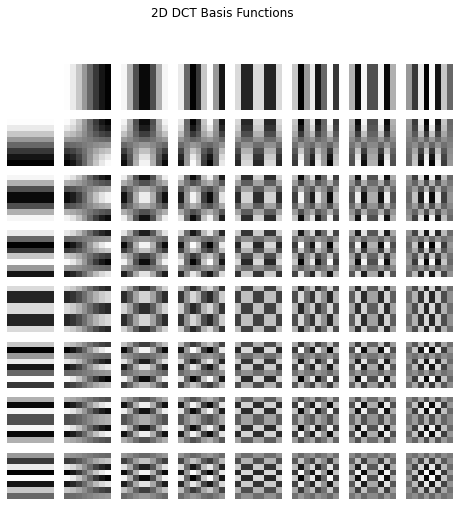

In [34]:
import numpy as np
import matplotlib.pyplot as plt


# Matrix size
N = 8

# Compute 2D Fourier basis functions
Wf = np.empty((N, N, N, N), dtype=complex)
for k1 in range(N):
    for k2 in range(N):
        for n1 in range(N):
            for n2 in range(N):
                Wf[n1, n2, k1, k2] = np.exp(2j * np.pi * (k1 * n1 / N + k2 * n2 / N))

# Compute 2D DCT basis functions
Wdct = np.empty((N, N, N, N))
for k1 in range(N):
    for k2 in range(N):
        for n1 in range(N):
            for n2 in range(N):
                Wdct[n1, n2, k1, k2] = np.cos(np.pi / N * (n1 + 0.5) * k1) * np.cos(np.pi / N * (n2 + 0.5) * k2)

# Plot Fourier basis functions
plt.figure(figsize=(8, 8))
for i in range(N):
    for j in range(N):
        plt.subplot(N, N, i*N+j+1)
        plt.imshow(np.real(Wf[:,:,i,j]), cmap='gray', vmin=-1, vmax=1)
        plt.axis('off')
plt.suptitle('2D Fourier Basis Functions')

# Plot DCT basis functions
plt.figure(figsize=(8, 8))
for i in range(N):
    for j in range(N):
        plt.subplot(N, N, i*N+j+1)
        plt.imshow(Wdct[:,:,i,j], cmap='gray', vmin=-1, vmax=1)
        plt.axis('off')
plt.suptitle('2D DCT Basis Functions')
plt.show()
